## Logistic Regression

#### Import all Libraries needed for the model 

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import pylab as pl

Import the Open Food Dataset . First import only 10000 records . 

In [3]:
pd_1 = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t',nrows = 10000 )
pd_1.head()

/Users/vingadgil/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd_null = pd_1[pd_1.product_name.isnull()]
pd_null[['code','product_name','ingredients_text']].head()

,code,product_name,ingredients_text
1,0000000027205,NaN,NaN
10,0000007020254,NaN,NaN
23,0000069105241,NaN,NaN
28,0000140000083,NaN,NaN
29,00002523,NaN,NaN


In [5]:
len(pd_1[pd_1.ingredients_text.isnull()])


5546

In [6]:
pd_1[pd_1.ingredients_text.isnull()][['code','ingredients_text']].head()

,code,ingredients_text
0,0000000024600,NaN
1,0000000027205,NaN
2,0000000036252,NaN
3,0000000039259,NaN
4,0000000039529,NaN


In [7]:
len(pd_1)

10000

Select only records from data which actually have ingredients i.e. ingredients_text NE NaN

In [8]:
pd_1 = pd_1[pd_1.ingredients_text.notnull()]
len(pd_1)

4454

In [9]:
# get col names
col_names = pd_1.columns.values.tolist()
col_names

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [11]:
pd_new = pd_1[['code' , 'product_name' , 'ingredients_text', 'additives','additives_n']]
pd_new = pd_new[pd_new.ingredients_text.notnull()]
pd_new.head()

,code,product_name,ingredients_text,additives,additives_n
5,0000000056434,diet lemonade by Sainsbury's,"carbonated water, acid: citric acid; flavouri...",[ carbonated-water -> en:carbonated-water ] ...,4.0
6,0000001071894,Flute,Wheat,[ wheat -> en:wheat ],0.0
7,0000001471762,still Scottish water,water,[ water -> en:water ],0.0
8,0000001798180,Fairtrade Ground Cinnamon,cinnamon,[ cinnamon -> en:cinnamon ],0.0
9,0000005200016,lentilles vertes,lentilles vertes,[ lentilles-vertes -> fr:lentilles-vertes ] ...,0.0


In [12]:
pd_new.describe()

,additives_n
count,4452.000000
mean,1.639263
std,2.444011
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,23.000000


#### Calculate Top 50 Ingredients from the Ingredients_text

In [13]:
# Calculate top 50 Ingredients -

# just take cols we want
#df = pd_1[['code' , 'product_name' , 'ingredients_text' ,'additives_n']]

# drop rows that have no ingredients
#df = df[df.ingredients_text.notnull()]


# get counts by ingredient
# taken from http://stackoverflow.com/questions/12680754/split-pandas-dataframe-string-entry-to-separate-rows
df_ingredients_tmp = pd_new[['code' , 'ingredients_text']]
df_ingredients_tmp.head()

,code,ingredients_text
5,0000000056434,"carbonated water, acid: citric acid; flavouri..."
6,0000001071894,Wheat
7,0000001471762,water
8,0000001798180,cinnamon
9,0000005200016,lentilles vertes


Split all the ingredients_text by comma ','

In [14]:
df_ingredients = df_ingredients_tmp.ingredients_text.str.split(',').tolist()
df_ingredients

[['carbonated  water',
  ' acid: citric acid; flavourings',
  ' acidity regular: trisodium citrate; sweetener: sucralose; preservative: potassium sorbate'],
 ['Wheat'],
 ['water'],
 ['cinnamon'],
 ['lentilles vertes'],
 ['Sucre',
  ' farine de _Blé_',
  ' graisse et huiles végétales (karité',
  ' colza et tournesol)',
  ' cacao maigre en poudre 7%',
  ' sirop de glucose',
  ' dextrine',
  ' _Beurre_ concentré',
  ' _Oeufs_',
  ' pâte de _Noisette_',
  ' pâte de cacao',
  ' émulsifiants : lécithines (colza et tournesol)',
  ' sel',
  " poudre à lever : carbonates d'ammonium",
  ' arômes.'],
 ['Thé noir de Chine',
  " zestes d'oranges 7",
  '5 %',
  ' arômes naturels (cannelle 4',
  '7 %',
  ' orange 4',
  '7 %',
  ' poudre de cannelle 3',
  '9 %).'],
 ['Sirop saveur pistache 5 cl : sirop 99',
  '16 % (sucre cristallisé',
  ' eau)',
  ' arôme',
  ' acidifiant : acide citrique E330',
  ' denrée alimentaire colorante (concentrés de carthame',
  ' pomme)',
  " colorant : mélange d'additifs 

In [15]:
df_tmp = pd.DataFrame(df_ingredients,index=df_ingredients_tmp.code).stack() 
df_tmp

code             
0000000056434  0                                     carbonated  water
               1                        acid: citric acid; flavourings
               2      acidity regular: trisodium citrate; sweetener...
0000001071894  0                                                 Wheat
0000001471762  0                                                 water
0000001798180  0                                              cinnamon
0000005200016  0                                      lentilles vertes
0000007730009  0                                                 Sucre
               1                                       farine de _Blé_
               2                   graisse et huiles végétales (karité
               3                                   colza et tournesol)
               4                             cacao maigre en poudre 7%
               5                                      sirop de glucose
               6                                           

In [16]:
df_tmp = df_tmp.reset_index()[[0, 'code']] # var1 variable is currently labeled 0
df_tmp.columns = ['ingredients_text', 'code'] # renaming var1
df_tmp.head()

,ingredients_text,code
0,carbonated water,0000000056434
1,acid: citric acid; flavourings,0000000056434
2,acidity regular: trisodium citrate; sweetener...,0000000056434
3,Wheat,0000001071894
4,water,0000001471762


In [17]:
# Get the count for each ingredients.

df1 = df_tmp['ingredients_text'].str.upper().value_counts()
df1.index

Index([' SEL', ' SALT', ' SUCRE', ' SUGAR', ' EAU', ' WATER', ' DEXTROSE',
       ' NIACIN', ' CITRIC ACID', ' SIROP DE GLUCOSE',
       ...
       ' CONTAINS 2% OR LESS OF EACH OF THE FOLLOWING: SPICES', '  AQUA',
       ' SUCRALOSE (14 MG PER 100 G SERVING)', ' MA', 'BEURRE (CRÈME',
       ' VITAL _WHEAT_ _GLUTEN_', ' PIPAS DE GIRASOL*', ' TAURINE 0',
       ' CAROTTE) ; SEL', ' DRIED VINE FRUITS 43% (SULTANAS'],
      dtype='object', length=17793)

In [18]:
df_tmp['ingredients_text'] = df_tmp['ingredients_text'].str.upper()

In [18]:
#df1.dtypes

dtype('int64')

In [19]:
# group by each ingredient and count unique number of products ('code')
df_ingredients_ranks = pd.DataFrame(df_tmp.groupby('ingredients_text').code.nunique())
# rename col
df_ingredients_ranks.columns = ['num_products'] # renaming
# sort it
df_ingredients_ranks = df_ingredients_ranks.sort(['num_products'], ascending=[False])
# here is the top 50 ingredients
df_ingredients_top50 = df_ingredients_ranks.head(50)
df_ingredients_top50

/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,num_products
ingredients_text,
SEL,701
SALT,658
SUCRE,590
SUGAR,462
EAU,429
WATER,280
DEXTROSE,264
NIACIN,183
CITRIC ACID,169


In [42]:
#df_ingredients_ranks.to_csv('50ingredients.csv')

In [20]:
#df_ingredients_ranks.str.upper()
df_ingredients_ranks.columns.values.tolist()

['num_products']

In [21]:
pd_new = pd_new[['code' , 'product_name' , 'ingredients_text' ,'additives_n','additives']]


In [22]:
pd_new = pd_new[pd_new.ingredients_text.notnull()]
pd_new.head()

,code,product_name,ingredients_text,additives_n,additives
5,0000000056434,diet lemonade by Sainsbury's,"carbonated water, acid: citric acid; flavouri...",4.0,[ carbonated-water -> en:carbonated-water ] ...
6,0000001071894,Flute,Wheat,0.0,[ wheat -> en:wheat ]
7,0000001471762,still Scottish water,water,0.0,[ water -> en:water ]
8,0000001798180,Fairtrade Ground Cinnamon,cinnamon,0.0,[ cinnamon -> en:cinnamon ]
9,0000005200016,lentilles vertes,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...


### Creating the Logistic Regression Model 

Plotting Additives_N field. In order to plot the additives , we have ignored all entries which are 0. Just plotting values which are above 0.

In [23]:
pd_additive = pd_new[pd_new.additives_n > 0]

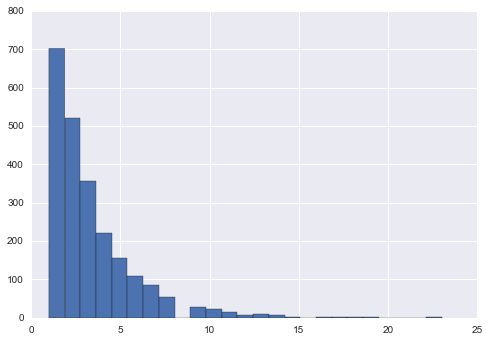

In [24]:
pd_additive.additives_n.hist(bins=25)

Since We would be using Additives_n column for Regression model we shall create a new column called'High Add' .


If Additives_n > 4 ,
     
   High Add = 1.
 
Else 

   High Add = 0.

In [25]:
pd_new['high_add'] = np.where(pd_new['additives_n']>4, '1', '0')

In [26]:
pd_new[pd_new['high_add'] == '1'].head(10)

,code,product_name,ingredients_text,additives_n,additives,high_add
17,0000027533024,Luxury Christmas Pudding,"Demerara Sugar, Sultanas (14%), Raisins (9.4%)...",5.0,[ demerara-sugar -> en:demerara-sugar ] [ s...,1
18,0000027533048,Luxury Christmas Pudding,"Demerara Sugar, Sultanas (14%), Raisins (9.4%)...",5.0,[ demerara-sugar -> en:demerara-sugar ] [ s...,1
32,000031,Cakes aux Fruits,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",11.0,[ fruits-37-4-fruits-confits-21 -> fr:fruits-...,1
33,00003100,Chair à saucisse,"Viandes de porc (86%), eau, acidifiant (E326),...",6.0,[ viandes-de-porc -> fr:viandes-de-porc ] [...,1
37,0000790310013,Sour Fruit Gummies,"sugar, corn syrup, white grape juice from conc...",10.0,[ sugar -> en:sugar ] [ corn-syrup -> en:co...,1
38,0000790310020,Jelly Fish,"sugar, corn syrup, modified corn starch, citri...",7.0,[ sugar -> en:sugar ] [ corn-syrup -> en:co...,1
45,000104,30 Panach' Fruits,Pâtisseries fourrées à la pulpe de pêche : far...,10.0,[ patisseries-fourrees-a-la-pulpe-de-peche ->...,1
67,00011815,Stem Ginger Dunkers,Farine de _blé_ contient _gluten_ (avec farine...,5.0,[ farine-de-ble-contient-gluten -> fr:farine-...,1
158,00090100,Pulled Pork & Chorizo Feijoada,"Riz basmati cuit (38%) (Eau, Riz basmati); Bou...",5.0,[ riz-basmati-cuit -> fr:riz-basmati-cuit ] ...,1
162,0009138378043,Rainbow Cherry,"Sugar, glucose syrup, citric acid, artificial ...",5.0,[ sugar -> en:sugar ] [ glucose-syrup -> en...,1


##### Based on the Top 50 ingredients and checking the Top 20 Additives on Web , we create new dummy variables.
TOP 20 Additives that we search in the Ingredients are -

1. SALT
2. SUGAR
3. CHOCO / CHOCOLATE
4. DEXTROSE
5. CITRIC ACID
6. AROME
7. COCOA BUTTER
8. GLUCOSE
9. CORN SYRUP
10. WHEAT
11. CARBONATED WATER
12. PALM OIL
13. MONOSODIUM GLUTAMATE
14. YEAST
15. HYDROGENATED OIL
16. ARTIFICIAL COLORS
17. SODIUM NITRATE / SODIUM NITRITE
18. BHA
19. BHT
20. STARCH
21. ARTIFICAL SWEETNERS- Saccharin,Aspartame,Sucralose,Agave nectar,Bleached starch


Create new Columns to check if ingredients have additives. For each Additive we add another column if ingredients 
have that material

In [27]:
pd_new['ingredients_text'] = pd_new['ingredients_text'].str.upper()

In [29]:
len(pd_new)

4454

In [1]:
def new_coumn(column_name,label):
    
    pattern = '|'.join(label)
    
    pd_new[column_name] = pd_new['ingredients_text'].str.contains(pattern)
    pd_new.column_name = pd_new.column_name.astype(int)
    
    return pd_new[column_name]

In [30]:
# Check if Ingredients have Wheat .

#pd_new['has_wheat'] = pd_new['ingredients_text'].str.match('Wheat|wheat',case = '1', na='0')

wheat = ['Wheat','wheat','Weizen','blé','trigo','WHEAT']

pattern = '|'.join(wheat)


pd_new['has_wheat'] = pd_new['ingredients_text'].str.contains(pattern)
pd_new.has_wheat = pd_new.has_wheat.astype(int)


In [31]:
# Check if Ingredients has Salt.

#pd_new['has_salt'] = pd_new['ingredients_text'].str.match('Salt|salt|SALT|SEL|SALZ',case = '1', na='0')

salt = ['Salt','SALT','SAL','SALZ','SEL']

pattern = '|'.join(salt)
pd_new['has_salt'] = pd_new['ingredients_text'].str.contains(pattern) 
pd_new.has_salt = pd_new.has_salt.astype(int)

In [32]:
# Check if Ingredients has Sugar

sugar = ['SUGAR','SUCRE','AZÚCAR','ZUCKER','Sugar']
sugar = '|'.join(sugar)

pd_new['has_sugar'] = pd_new['ingredients_text'].str.contains(sugar)
pd_new.has_sugar = pd_new.has_sugar.astype(int)



In [34]:
# Check if Ingredients has Chocolate .

chocolate = ['CHOCO','CHOCOLATE','CHOCOLAT','SCHOKOLADE','Chocolate']

chocolate = '|'.join(chocolate)

pd_new['has_choco'] = pd_new['ingredients_text'].str.contains(chocolate)
pd_new.has_choco = pd_new.has_choco.astype(int)

In [35]:
# Check if Ingredients has Milk

milk = ['MILK','LECHE','MILCHE','LAIT','Milk']
milk = '|'.join(milk)

pd_new['has_milk'] = pd_new['ingredients_text'].str.contains(milk)
pd_new.has_milk = pd_new.has_milk.astype(int)


In [36]:
# Check if Ingredients has Color

color = ['Color','COLOR','FARBE','COULEUR']
color = '|'.join(color)

pd_new['has_color'] = pd_new['ingredients_text'].str.contains(color)
pd_new.has_color = pd_new.has_color.astype(int)


In [37]:
# Check if Ingredients has Sodium Nitrate , Sodium Nitrite
sodium = ['Sodium Nitrate','SODIUM NITRATE','Sodium Nitrite','SODIUM NITRITE']
sodium = '|'.join(sodium)

pd_new['has_sodium'] = pd_new['ingredients_text'].str.contains(sodium)
pd_new.has_sodium = pd_new.has_sodium.astype(int)


In [39]:
# Check if Ingredients has Corn Syrup

corn_syrup = ['Corn Syrup','CORN SYRUP','MAISSIRUP','SIROP DE MAÏS','JARABE DE MAÍZ']
corn_syrup = '|'.join(corn_syrup)

pd_new['has_corn_syrup'] = pd_new['ingredients_text'].str.contains(corn_syrup)
pd_new.has_corn_syrup = pd_new.has_corn_syrup.astype(int)



In [40]:
# Check if Ingredients has BHA

bha = ['Bha','BHA']
bha = '|'.join(bha)

pd_new['has_bha'] = pd_new['ingredients_text'].str.contains(bha)
pd_new.has_bha = pd_new.has_bha.astype(int)

In [41]:
# Check if Ingredients has BHT

bht = ['Bht','BHT']
bht = '|'.join(bht)

pd_new['has_bht'] = pd_new['ingredients_text'].str.contains(bht)
pd_new.has_bht = pd_new.has_bht.astype(int)

In [42]:
# Check if Ingredients has MSG

msg = ['MSG','Msg','MONOSODIUM GLUTAMATE']
msg = '|'.join(msg)

pd_new['has_msg'] = pd_new['ingredients_text'].str.contains(msg)
pd_new.has_msg = pd_new.has_msg.astype(int)

In [43]:
# Check if Ingredients has YEAST

yeast = ['Yeast','YEAST','LEVURE','HEFE','LEVADURA']
yeast = '|'.join(yeast)

pd_new['has_yeast'] = pd_new['ingredients_text'].str.contains(yeast)
pd_new.has_yeast = pd_new.has_yeast.astype(int)
    

In [44]:
# Check if Ingredients has Carbonated Water

carbon = ['Carbonated Water','CARBONATED WATER','EAU GAZEUSE','AGUA CARBONATADA','WASSER MIT KOHLENSÄURE']
carbon = '|'.join(carbon)

pd_new['has_carbon'] = pd_new['ingredients_text'].str.contains(carbon)
pd_new.has_carbon = pd_new.has_carbon.astype(int)

In [45]:
# Check if Ingredients has Palm Oil

palm = ['Palm Oil','PALM OIL','PALMÖL','HUILE DE PALME','ACEITE DE PALMA']
palm = '|'.join(palm)

pd_new['has_palm'] = pd_new['ingredients_text'].str.contains(palm)
pd_new.has_palm = pd_new.has_palm.astype(int)


In [46]:
# Check if Ingredients has Hydrogenated Oil

hyr_oil = ['Hydrogenated','HYDROGENATED','HIDROGENADO','HYDROGENIERT','HYDROGÉNÉ']
hyr_oil = '|'.join(hyr_oil)

pd_new['has_hyr_oil'] = pd_new['ingredients_text'].str.contains(hyr_oil)
pd_new.has_hyr_oil = pd_new.has_hyr_oil.astype(int)


In [47]:
# Check if Ingredients has Artificial Sweetners

art_sweet = ['SACCHARIN','ASPARTAME','SUCRALOSE','AGAVE NECTAR']
art_sweet = '|'.join(art_sweet)

pd_new['has_art_sweet'] = pd_new['ingredients_text'].str.contains(palm)
pd_new.has_art_sweet = pd_new.has_art_sweet.astype(int)

In [48]:
# Check if Ingredients has DEXTROSE

dextrose = ['Dextrose','DEXTROSE','','']
dextrose = '|'.join(dextrose)

pd_new['has_dextrose'] = pd_new['ingredients_text'].str.contains(dextrose)
pd_new.has_dextrose = pd_new.has_dextrose.astype(int)

In [49]:
# Check if Ingredients has GLUCOSE

glucose = ['Glucose','GLUCOSE','','']
glucose = '|'.join(glucose)

pd_new['has_glucose'] = pd_new['ingredients_text'].str.contains(dextrose)
pd_new.has_glucose = pd_new.has_glucose.astype(int)

In [50]:
# Check if Ingredients has cocoa butter

cocoa = ['Cocoa Butter','COCOA BUTTER','COCOA','KAKAOBUTTER','LE BEURRE DE CACAO','CACAO','KAKAO']
cocoa = '|'.join(cocoa)

pd_new['has_cocoa'] = pd_new['ingredients_text'].str.contains(cocoa)
pd_new.has_cocoa = pd_new.has_cocoa.astype(int)

In [51]:
# manually add the intercept
pd_new['intercept'] = 1.0

In [52]:
pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 5 to 9999
Data columns (total 26 columns):
code                4454 non-null object
product_name        4417 non-null object
ingredients_text    4454 non-null object
additives_n         4452 non-null float64
additives           3987 non-null object
high_add            4454 non-null object
has_wheat           4454 non-null int64
has_salt            4454 non-null int64
has_sugar           4454 non-null int64
has_choco           4454 non-null int64
has_milk            4454 non-null int64
has_color           4454 non-null int64
has_sodium          4454 non-null int64
has_corn_syrup      4454 non-null int64
has_bha             4454 non-null int64
has_bht             4454 non-null int64
has_msg             4454 non-null int64
has_yeast           4454 non-null int64
has_carbon          4454 non-null int64
has_palm            4454 non-null int64
has_hyr_oil         4454 non-null int64
has_art_sweet       4454 non-null int64
has_de

In [61]:
#pd_new.head(20)

In [55]:
train_cols = pd_new.columns[6:]

In [56]:
train_cols

Index(['has_wheat', 'has_salt', 'has_sugar', 'has_choco', 'has_milk',
       'has_color', 'has_sodium', 'has_corn_syrup', 'has_bha', 'has_bht',
       'has_msg', 'has_yeast', 'has_carbon', 'has_palm', 'has_hyr_oil',
       'has_art_sweet', 'has_dextrose', 'has_glucose', 'has_cocoa',
       'intercept'],
      dtype='object')

In [63]:
pd_new['high_add'] = pd_new['high_add'].astype(int)

In [73]:
pd_new.to_csv('abcd.csv')

LOGISTIC REGRESSION MODEL

In [67]:
#train_cols = ['high_add' , 'has_wheat' , 'has_salt' , 'has_sugar', 'has_choco' ,'has_milk']
# 

train_cols
logit = sm.Logit(pd_new['high_add'], pd_new[train_cols])

# fit the model
#result = logit.fit()

In [68]:
logit

In [69]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.265643
         Iterations 7


LinAlgError: Singular matrix

In [65]:
result.summary()

NameError: name 'result' is not defined

In [65]:
# look at the confidence interval of each coeffecient
result.conf_int()

,0,1
code,-9.178167e-18,7.584645e-18
has_wheat,-3.303650e+03,3.339983e+03
has_salt,-2.470798e+04,2.474964e+04
has_sugar,-2.061463e+02,2.341394e+02
has_choco,-1.264853e+04,1.269014e+04
has_milk,-2.381801e+04,2.386251e+04


In [66]:
np.exp(result.params)

code         1.000000e+00
has_wheat    7.755663e+07
has_salt     1.114316e+09
has_sugar    1.198494e+06
has_choco    1.086389e+09
has_milk     4.586564e+09
dtype: float64

### Create Additional Dummy Columns in dataframe for TOP 20 CATEGORIES

Create Dummy Variables for each of the Categories. The Top 20 Categories are -


Plant-based foods and beverages                     
Sugary snacks                                        
Beverages                                            
Dairies                                              
Groceries                                            
Meats                                                
Fresh foods                                          
Meals                                                
Salty snacks                                         
Canned foods                                         
Frozen foods                                         
Fruit juices                                         
Breakfasts                                            
Seafood                                               
Desserts                                              
Spreads                                               
Sandwiches                                            
Sweeteners                                            
Baby foods                                            
Farming products                                      
Fruit juices and nectars                              

In [ ]:
# Plant based food and beverages
pd_new['is_plant'] = pd_new['main_category_en'].isin('Plant-based foods and beverages')
pd_new.is_plant = pd_new.is_plant.astype(int)

# Dessert
pd_new['is_dessert'] = pd_new['main_category_en'].isin('Desserts')
pd_new.is_dessert = pd_new.is_dessert.astype(int)


# Sugary snacks
pd_new['is_sugary'] = pd_new['main_category_en'].isin('Sugary snacks')
pd_new.is_sugary = pd_new.is_sugary.astype(int)

# Meat
pd_new['is_meat'] = pd_new['main_category_en'].isin('Meats')
pd_new.is_meat = pd_new.is_meats.astype(int)

# Fresh Food
pd_new['is_freshfood'] = pd_new['main_category_en'].isin('Fresh Foods')
pd_new.is_freshfood = pd_new.is_freshfood.astype(int)

# Dairies
pd_new['is_dairies'] = pd_new['main_category_en'].isin('Dairies')
pd_new.is_dairies = pd_new.is_dairies.astype(int)

# Salty snacks
pd_new['is_salty'] = pd_new['main_category_en'].isin('Salty snacks')
pd_new.is_salty = pd_new.is_salty.astype(int)

# Beverages
pd_new['is_beverage'] = pd_new['main_category_en'].isin('Beverages')
pd_new.is_beverage = pd_new.is_beverage.astype(int)

# Seafood
pd_new['is_seafood'] = pd_new['main_category_en'].isin('Seafood')
pd_new.is_seafood = pd_new.is_seafood.astype(int)


# Baby food
pd_new['is_babyfood'] = pd_new['main_category_en'].isin('Baby foods')
pd_new.is_babyfood = pd_new.is_babyfood.astype(int)

# Frozen foods
pd_new['is_frozen'] = pd_new['main_category_en'].isin('Frozen foods')
pd_new.is_frozen = pd_new.is_frozen.astype(int)


# Fruit Juices
pd_new['is_fruitjuice'] = pd_new['main_category_en'].isin('Fruit juices')
pd_new.is_fruitjuice = pd_new.is_fruitjuice.astype(int)


# Canned foods
pd_new['is_canned'] = pd_new['main_category_en'].isin('Canned foods')
pd_new.is_canned = pd_new.is_frozen.astype(int)

# Sandwiches
pd_new['is_sandwich'] = pd_new['main_category_en'].isin('Sandwiches')
pd_new.is_sandwich = pd_new.is_sandwich.astype(int)


